In [1]:
# import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
titanic=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# number of row and columns in the dataset
titanic.shape

(891, 12)

the structure of the data is 191 row,12 column

In [5]:
# get the information about dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


there are dtypes: float64(2), int64(5), object(5)

In [6]:
# lets check the missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

in age column 177 nulls
in cabin column 687 nulls
so cabin column is usless for this dataset

In [7]:
# lets deal with missing value as you see the cabin contain more than 80% of missing value so it is better to drop the column
titanic=titanic.drop(columns='Cabin',axis=1)



In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
titanic.shape

(891, 11)

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
# Replace missing values in 'Age' column with the mean value within each group defined by 'Sex' and 'Embarked'
titanic['Age'] = titanic.groupby(['Sex', 'Embarked'])['Age'].transform(lambda x: x.fillna(x.mean()))


In [12]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            2
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
# lets drop the missing values of 'Embarked'
titanic.dropna(axis=0,inplace=True)

In [14]:
#now check whether missing value are present or not
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# now reset the index
titanic.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
885,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.771505,1,2,W./C. 6607,23.4500,S
887,889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [16]:
# let check the stratistic measure of the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.632283,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.017418,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Define the columns of interest
columns_of_interest = [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked']

# Calculate the value counts for each column
for column in columns_of_interest:
    counts = titanic[column].value_counts()
    print("Value counts for column:", column)
    print(counts)
    print()


Value counts for column: Survived
Survived
0    549
1    340
Name: count, dtype: int64

Value counts for column: Pclass
Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Value counts for column: Sex
Sex
male      577
female    312
Name: count, dtype: int64

Value counts for column: Age
Age
30.291440    73
24.000000    30
22.000000    27
18.000000    26
32.998841    26
             ..
66.000000     1
20.500000     1
55.500000     1
0.920000      1
74.000000     1
Name: count, Length: 94, dtype: int64

Value counts for column: SibSp
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Value counts for column: Parch
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Value counts for column: Embarked
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



In [18]:
sns.set()

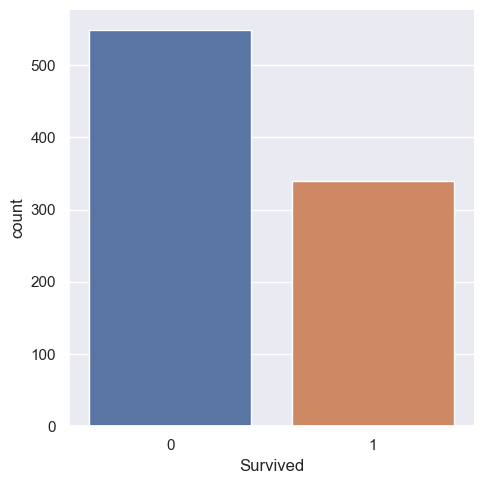

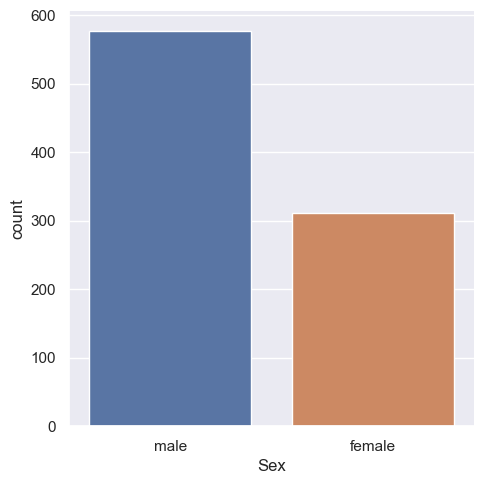

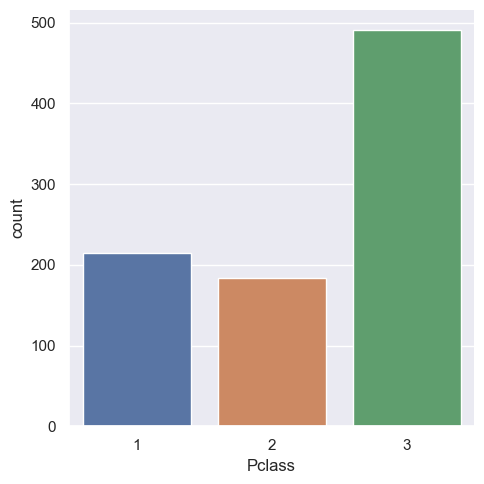

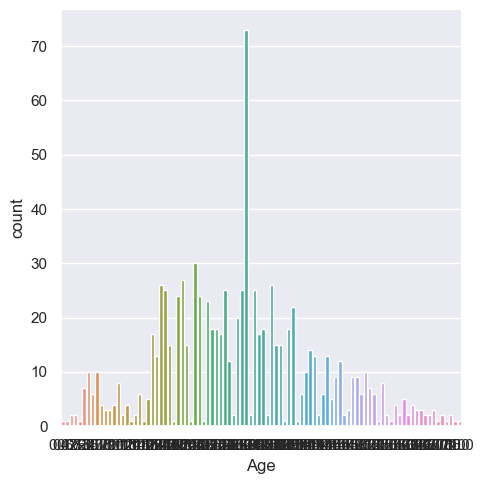

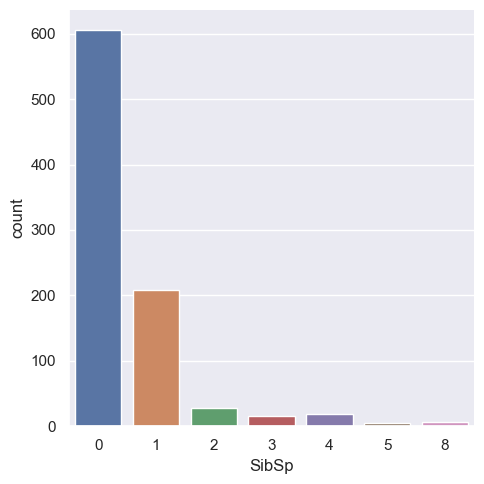

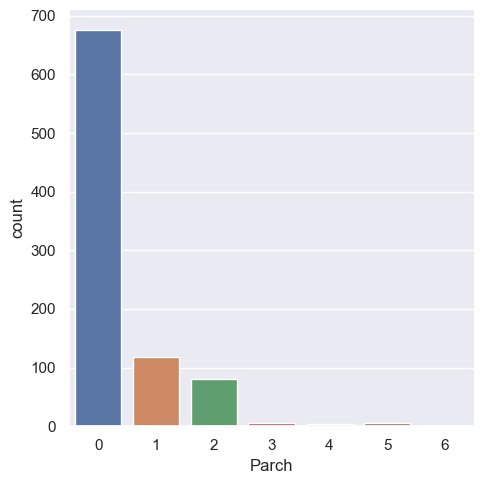

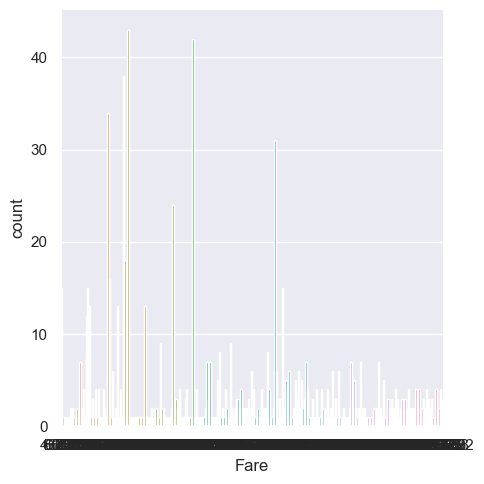

In [19]:



columns_to_include = ['Survived', 'Sex', 'Pclass','Age','SibSp','Parch','Fare']

# Create a catplot for each column
for column in columns_to_include:
    sns.catplot(x=column, data=titanic, kind='count')


In [20]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.771505,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [21]:
# encode the 'Sex','Parch','Embarked'
columns_to_encode = ['Sex', 'Pclass', 'Embarked']
label_encoder = LabelEncoder()

# Create a loop to encode each column
for column in columns_to_encode:
    titanic[column] = label_encoder.fit_transform(titanic[column])

# Display the encoded DataFrame
print(titanic)


     PassengerId  Survived  Pclass  \
0              1         0       2   
1              2         1       0   
2              3         1       2   
3              4         1       0   
4              5         0       2   
..           ...       ...     ...   
886          887         0       1   
887          888         1       0   
888          889         0       2   
889          890         1       0   
890          891         0       2   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                                 ...  .

In [22]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,2,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,0,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.771505,1,2,W./C. 6607,23.4500,2
889,890,1,0,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [23]:
X=titanic.drop(columns=['PassengerId', 'Survived','Name','Ticket'],axis=1)
Y=titanic.Survived

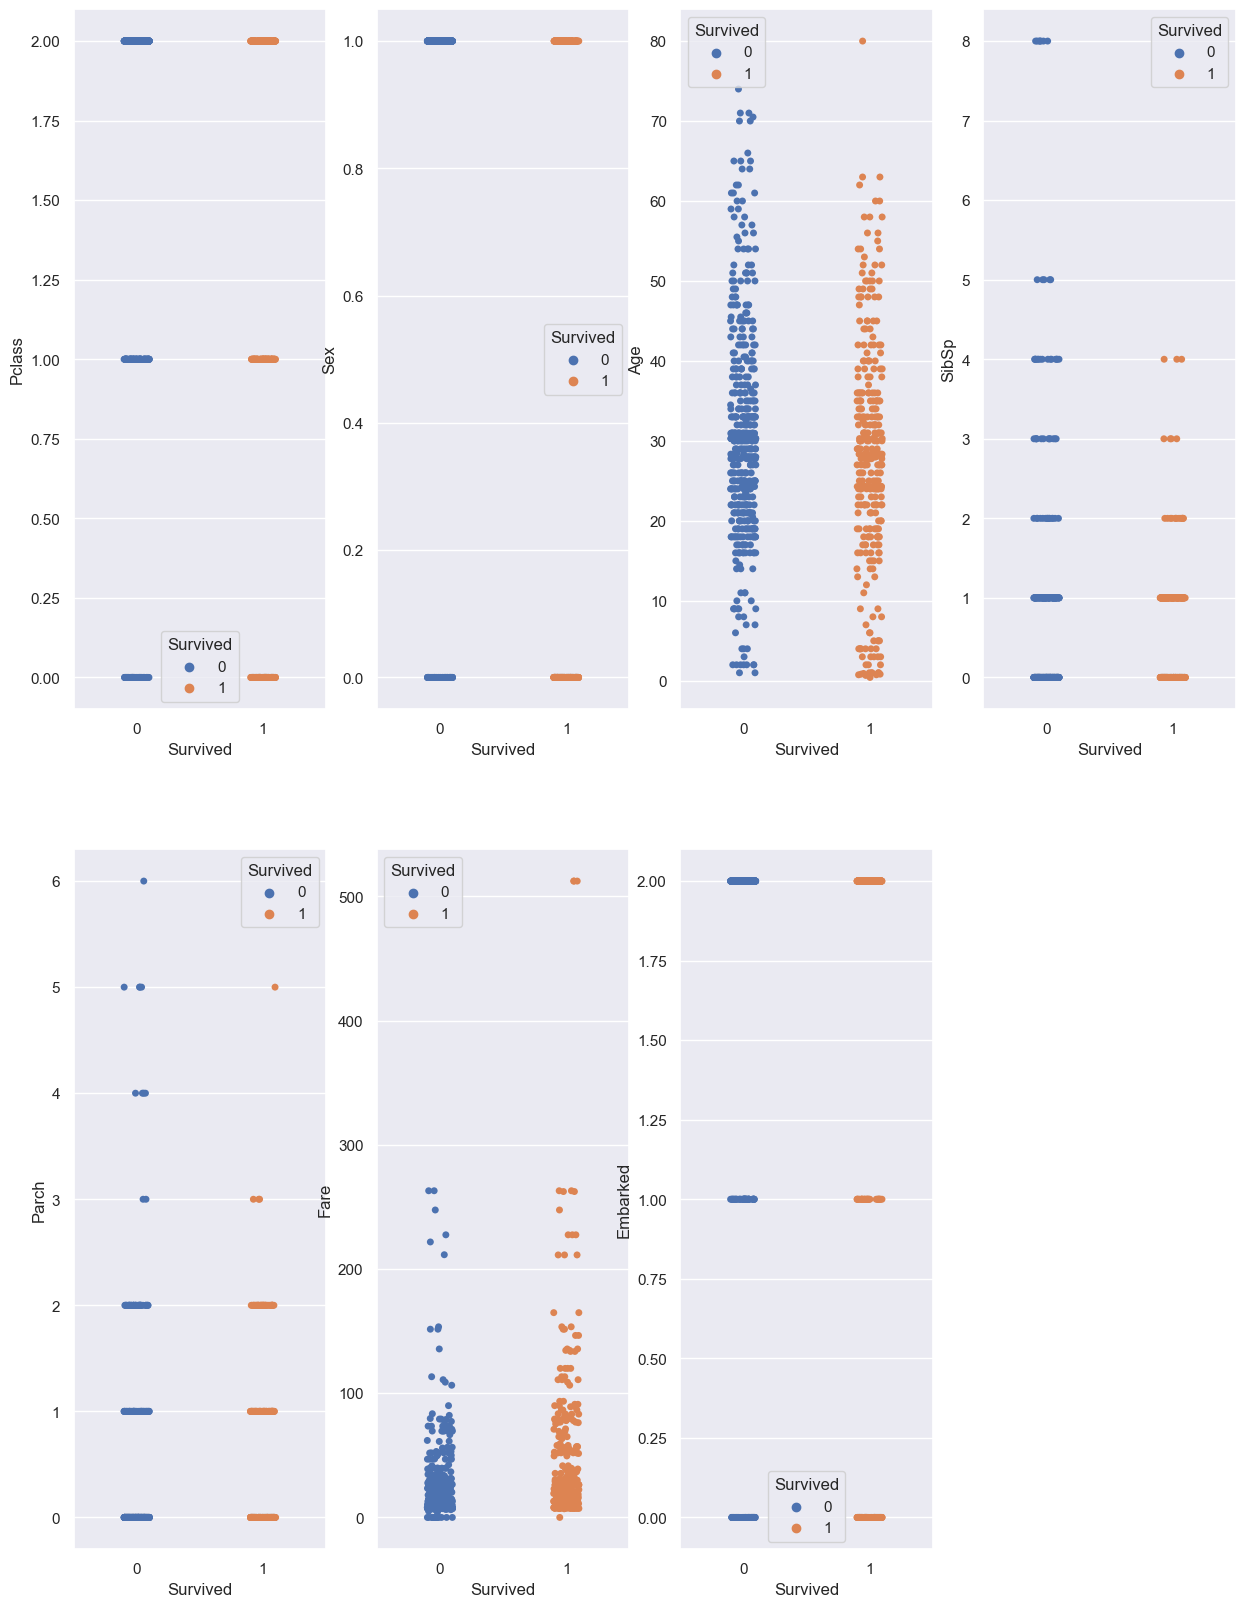

In [24]:
# lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber=1
for column in X:
    if plotnumber<=9:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(x=Y,y=X[column],hue=Y)
    plotnumber+=1
plt.show()

as age and fare columns highly corelated with label 

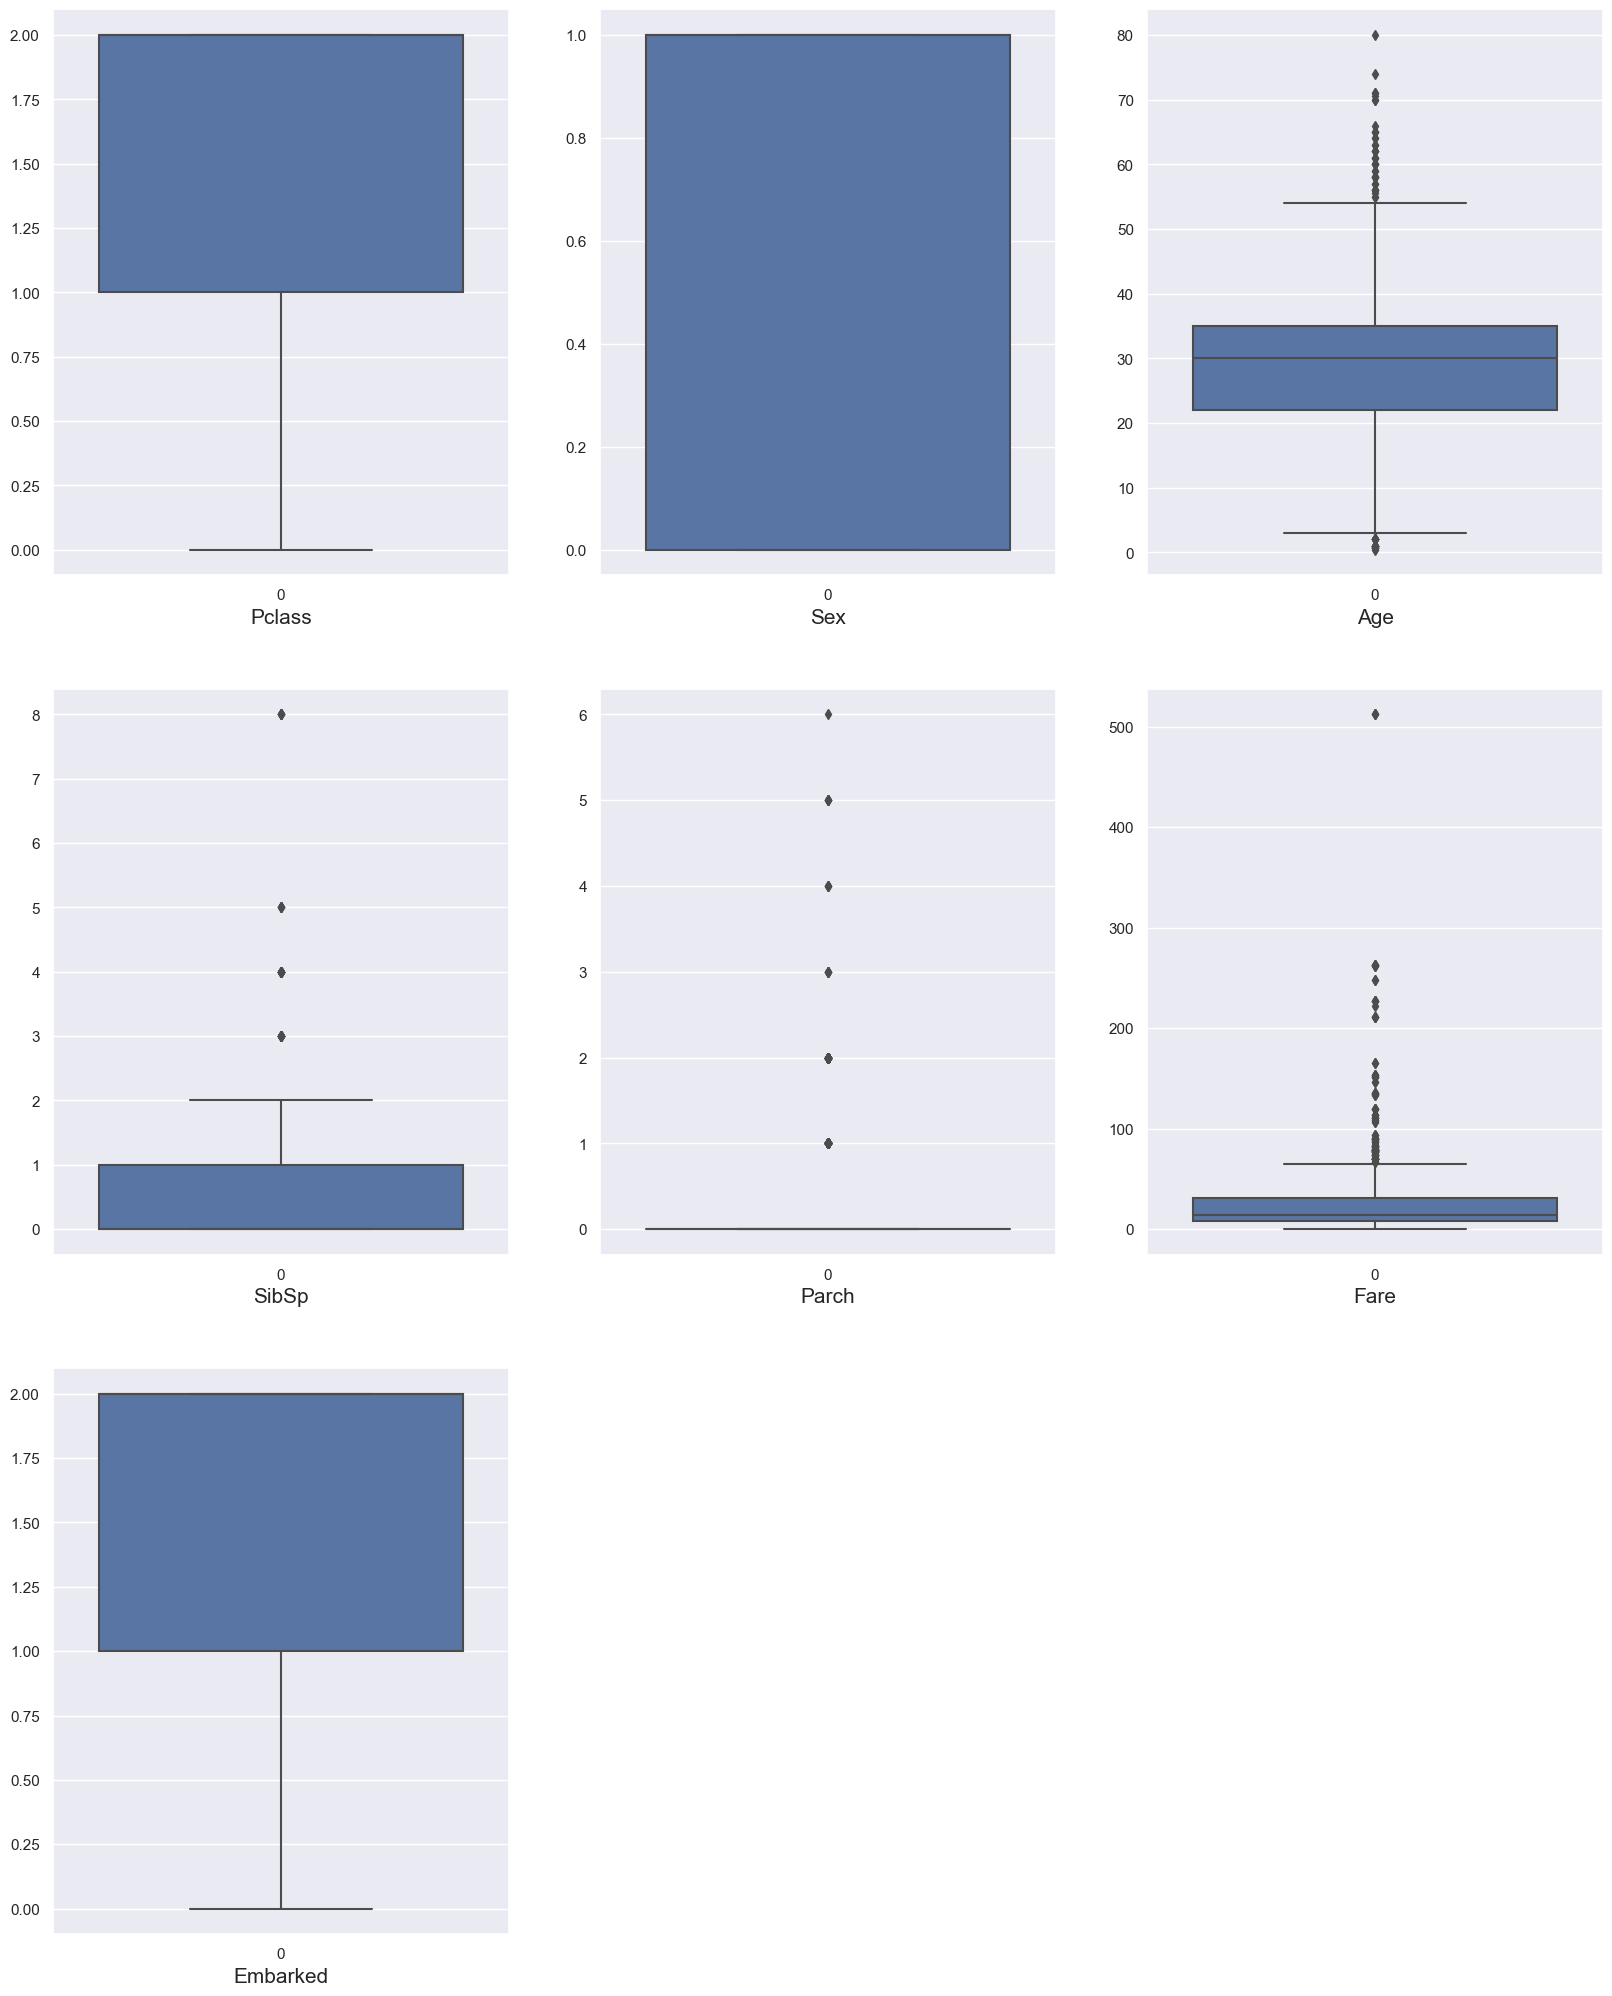

In [25]:
# visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in X:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=X[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

as each and every passenger is important so even we have outlier it is important to keep for prediction

In [26]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
X=titanic.drop(columns=['PassengerId', 'Survived','Name','Ticket'],axis=1)
Y=titanic.Survived

In [28]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.000000,1,0,7.2500,2
1,0,0,38.000000,1,0,71.2833,0
2,2,0,26.000000,0,0,7.9250,2
3,0,0,35.000000,1,0,53.1000,2
4,2,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,1,1,27.000000,0,0,13.0000,2
887,0,0,19.000000,0,0,30.0000,2
888,2,0,27.771505,1,2,23.4500,2
889,0,1,26.000000,0,0,30.0000,0


# train test split

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=348)

In [31]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(889, 7) (666, 7) (223, 7) (666,) (223,)


# model training

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(X_train,Y_train)

LogisticRegression()

# model evaulation

In [34]:
# lets see how well our model performs on the test data set
y_pred=lr.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [35]:
lr.predict(X_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [36]:
# model accuracy
accuracy=accuracy_score(Y_test,y_pred)*100
accuracy

82.51121076233184

In [37]:
# confusion matrix
conf_mat=confusion_matrix(Y_test,y_pred)
conf_mat

array([[112,  19],
       [ 20,  72]], dtype=int64)

In [38]:
# classification report
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       131
           1       0.79      0.78      0.79        92

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.82      0.83      0.82       223



# lets check with multiple model

In [39]:
# plot ROC/AUC for multiple models without hyperparams tuning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_auc_score,auc,roc_curve

In [40]:
X=titanic.drop(columns=['PassengerId', 'Survived','Name','Ticket'],axis=1)
Y=titanic.Survived

# train your models
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()


Threshold of Logistic Regression [       inf 0.96841972 0.90246056 0.89183606 0.84188042 0.83619623
 0.82825221 0.81113328 0.80945904 0.79910113 0.7796143  0.77858963
 0.73335755 0.72875984 0.70559204 0.69716305 0.68549725 0.68333029
 0.68331283 0.68330568 0.63287784 0.62604846 0.59230796 0.58365931
 0.5744793  0.55888141 0.55489049 0.53219963 0.51724778 0.49250983
 0.48902309 0.46860385 0.41864308 0.35057205 0.33102783 0.29123574
 0.28334718 0.26285091 0.26197964 0.24261066 0.23918511 0.23676211
 0.22748475 0.21831999 0.19447362 0.18277642 0.16323846 0.16206539
 0.15714386 0.15351252 0.1142667  0.11425964 0.10898584 0.10760859
 0.10126825 0.10113981 0.09972127 0.09627371 0.09576292 0.09322274
 0.09198137 0.09182142 0.08949198 0.08818938 0.08605086 0.0856468
 0.05126915 0.04908446 0.01347064 0.00840249]
Threshold of Random Forest [       inf 1.         0.99       0.98       0.97       0.96
 0.95       0.94       0.93       0.91       0.9        0.87083333
 0.86       0.84       0.83   

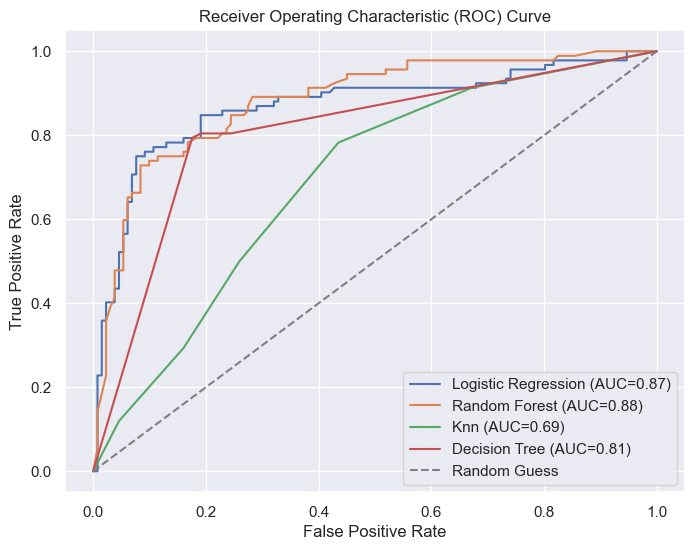

In [41]:
models = {'Logistic Regression': lr, 'Random Forest': rf, 'Knn': kn, 'Decision Tree': dt}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
    print('Threshold of', name, thresholds)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='{} (AUC={:.2f})'.format(name, roc_auc))

# add labels and legend to the plot
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()
